# Visualize multi class dataset with easyimages

* get the general feel of a dataset and inspect  it visually. 
* make sure it’s not corrupt and  does not contain any obvious artifacts (for instance  black only images)  
* make sure that all the files are readable – you don’t want to find that out in the middle of your training. 


In [15]:
from easyimages import EasyImageList, EasyImage

In [19]:
LI = EasyImageList.from_multilevel_folder("../data/butterfly_dataset")
LI.html(sample=10, size=100)


Drawing 046.Catopsilia_pomona


Drawing 061.Gonepteryx_rhamni


Drawing 062.Hebomoia_glaucippe


Drawing 075.Danaus_chrysippus


Drawing 108.Apatura_ilia


Drawing 109.Apatura_iris


Drawing 122.Neptis_hylas


Drawing 128.Clossiana_euphrosyne


Drawing 147.Junonia_iphita


Drawing 149.Kallima_inachus


# Distribution of Images
This chart displays the number of images in each subdirectory, making identifying any class imbalances or variations within our dataset easy. This visualization helps us understand the dataset’s structure and can guide decision-making in subsequent analysis.

Normally in image classification for example, one can easily oversample or downsample the dataset and  control each class contribution to the loss. 

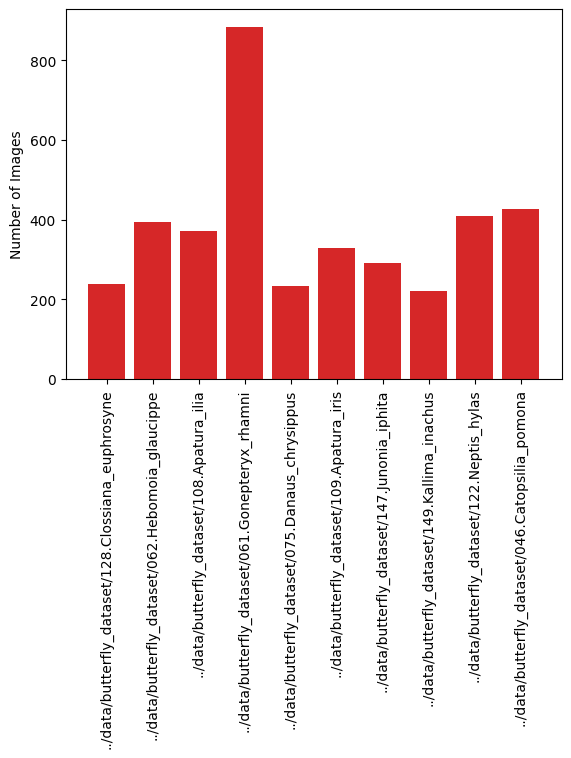

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import os

root_path = "../data/butterfly_dataset"

subdirectories = [os.path.join(root_path, d) for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]

# Count the number of images in each subdirectory
counts = [0] * len(subdirectories)
for i, directory in enumerate(subdirectories):
    counts[i] = len(os.listdir(directory))

# Create a bar chart to visualize the distribution
plt.bar(subdirectories, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

# Analyzing Image Properties

In [33]:
import os
import cv2
import numpy as np

root_path = "../data/butterfly_dataset"

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

# Plotting Scatter Plot of Image Resolutions: 

create a scatter plot using matplotlib.pyplot to visualize the distribution of image resolutions (width and height) within our dataset. This plot allows us to identify relationships, patterns, or clusters in the image resolutions. By examining the scatter plot, we can gain insights into the overall image dimensions and discover any irregularities or trends.

* Uniformly distributed where most of the images have the same dimensions – here  the only decision you will have to make is how much to resize (if at all) This will mainly depend on objects area, size and aspect ratios)
* Slightly bimodal distribution but most of the images are in the aspect ratio  range of (0.7  …  1.5) similar to the COCO dataset. I believe other “natural-looking” datasets would follow a similar distribution –  for those type of datasets you should be fine by going with a non-destructive resize -> Pad approach. Padding will be necessary but to a degree that is manageable and will not blow the size of the dataset too much.
* Dataset with a lot of extreme values (very wide images mixed with very narrow ones) – this case is much more tricky and there are more advanced techniques to avoid excessive padding. You might consider sampling batches of images based on the aspect ratio. Remember that this can introduce a bias to your sampling process – so make sure its acceptable or not strong enough.

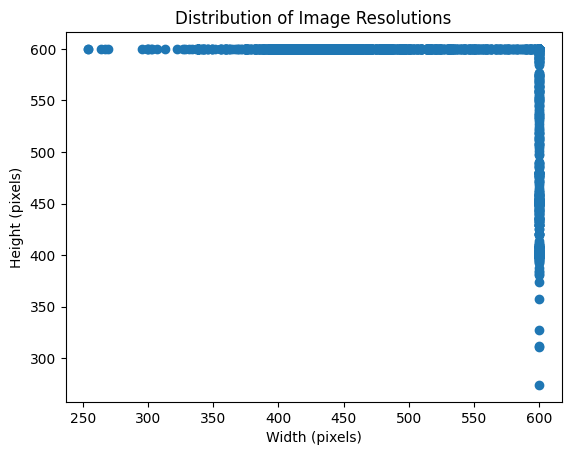

In [28]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

# Plotting the Mean Color Distribution 

Analyzing the colour distribution of images is another key characteristic in image data exploration. I will calculate the mean colour distribution across all images to understand the dominant colours in the dataset. This distribution can be visualized by creating a bar chart using matplotlib.pyplot. The graph will display the mean colour values and their frequencies, enabling us to identify the prominent colours within the image dataset.

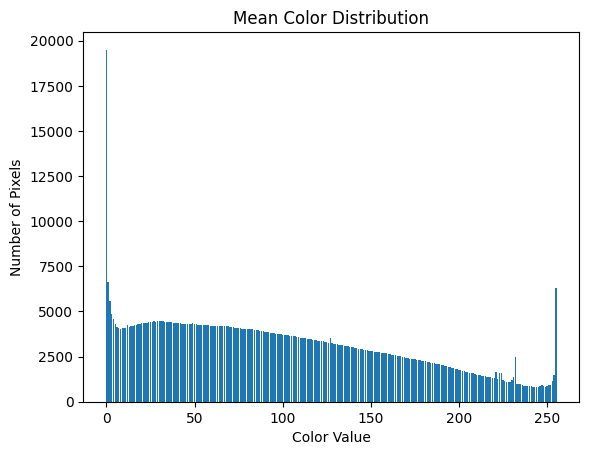

In [30]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()